# Data Preparation

### Cleaning the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# good_run = pd.read_csv('MM10 Good Run.csv', usecols=['TIME_STAMP', 'CAPAB_NAME', 'DATA_VALUE'], parse_dates=['TIME_STAMP'])
# bad_run = pd.read_csv('MM10 Nozzle Leak.csv', usecols=['TIME_STAMP', 'CAPAB_NAME', 'DATA_VALUE'], parse_dates=['TIME_STAMP'])

good_run = pd.read_csv('MM10 Good Run.csv', usecols=['TIME_STAMP', 'CAPAB_NAME', 'DATA_VALUE'])
bad_run = pd.read_csv('MM10 Nozzle Leak.csv', usecols=['TIME_STAMP', 'CAPAB_NAME', 'DATA_VALUE'])

In [2]:
from sklearn.base import BaseEstimator, TransformerMixin

class PivotTransformer(BaseEstimator, TransformerMixin):
    def __init__(self): # no *args or **kargs
        self  # nothing else to do
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        data = X.drop(X[pd.isna(X['TIME_STAMP'])].index)
        pivot_data = data.pivot(index='TIME_STAMP', columns='CAPAB_NAME', values='DATA_VALUE')
        reset_data = pivot_data.reset_index()

        unrelated_columns = "Mold Close Position (Mold Protect)", "Mold Load Detect Monitor Mode","Mold Load Detect Status", "Mold Open Limit Position", "Mold Protect Monitor Status (By Time)", "Mold Protect Monitor Time"
        unrelated_ix = [reset_data.columns.get_loc(c) for c in unrelated_columns]
        clean_data  = reset_data.drop(reset_data.columns[unrelated_ix], axis =1)
        return clean_data


In [3]:
pivoter = PivotTransformer()
good_run = pivoter.transform(good_run)
good_run.head()

CAPAB_NAME,TIME_STAMP,Barrel Temp Zone 1,Barrel Temp Zone 2,Barrel Temp Zone 3,Barrel Temp Zone 4,Barrel Temp Zone 5,Clamp Tonnage After Hold,Cooling Time,Cycle Time,Dose Time,Ejector Ejection Position,Ejector Ejection Speed,Filling Peak Pressure,Filling Time,Injection Speed,Min Cushion Position,Pack Pressure
0,10-05-22 0:00:04,500.18,500.18,509.9,519.80,510.62,78.010727,6.5,22.928,5.360,1.9,25.0,10579.58244,1.716,1.5,0.206846,10404.49128
1,10-05-22 0:00:24,500.00,500.00,509.9,519.98,510.26,77.954094,6.5,22.928,5.360,1.9,25.0,10579.58244,1.716,1.5,0.206846,10585.77663
2,10-05-22 0:00:44,500.00,500.00,509.9,519.98,510.26,77.954094,6.5,22.928,5.360,1.9,25.0,10579.58244,1.716,1.5,0.206846,10585.77663
3,10-05-22 0:01:04,500.00,500.00,509.9,519.98,510.26,77.954094,6.5,22.968,5.408,1.9,25.0,10495.91004,1.716,1.5,0.203000,10585.77663
4,10-05-22 0:01:24,499.64,499.82,509.9,520.16,509.54,77.994555,6.5,22.968,5.408,1.9,25.0,10495.91004,1.716,1.5,0.203000,10406.04345


In [4]:
bad_run = pivoter.transform(bad_run)
bad_run.head()

CAPAB_NAME,TIME_STAMP,Barrel Temp Zone 1,Barrel Temp Zone 2,Barrel Temp Zone 3,Barrel Temp Zone 4,Barrel Temp Zone 5,Clamp Tonnage After Hold,Cooling Time,Cycle Time,Dose Time,Ejector Ejection Position,Ejector Ejection Speed,Filling Peak Pressure,Filling Time,Injection Speed,Min Cushion Position,Pack Pressure
0,09-28-22 11:43:46,281.66,399.92,399.92,399.92,399.56,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.0,7863.406449
1,09-28-22 11:44:06,281.66,399.92,399.92,399.92,399.92,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.0,7863.406449
2,09-28-22 11:44:26,281.66,399.92,399.92,399.92,399.92,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.0,7863.406449
3,09-28-22 11:44:46,281.66,399.92,399.92,399.92,399.92,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.0,7863.406449
4,09-28-22 11:45:06,281.84,399.92,399.92,399.92,399.74,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.0,7863.406449


In [5]:
good_run['Label'] = 0
bad_run['Label'] = 1
total_runs = pd.concat([good_run, bad_run])
total_runs['Label'].value_counts()

0    10547
1     9226
Name: Label, dtype: int64

In [6]:
total_runs.head()

CAPAB_NAME,TIME_STAMP,Barrel Temp Zone 1,Barrel Temp Zone 2,Barrel Temp Zone 3,Barrel Temp Zone 4,Barrel Temp Zone 5,Clamp Tonnage After Hold,Cooling Time,Cycle Time,Dose Time,Ejector Ejection Position,Ejector Ejection Speed,Filling Peak Pressure,Filling Time,Injection Speed,Min Cushion Position,Pack Pressure,Label
0,10-05-22 0:00:04,500.18,500.18,509.9,519.80,510.62,78.010727,6.5,22.928,5.360,1.9,25.0,10579.58244,1.716,1.5,0.206846,10404.49128,0
1,10-05-22 0:00:24,500.00,500.00,509.9,519.98,510.26,77.954094,6.5,22.928,5.360,1.9,25.0,10579.58244,1.716,1.5,0.206846,10585.77663,0
2,10-05-22 0:00:44,500.00,500.00,509.9,519.98,510.26,77.954094,6.5,22.928,5.360,1.9,25.0,10579.58244,1.716,1.5,0.206846,10585.77663,0
3,10-05-22 0:01:04,500.00,500.00,509.9,519.98,510.26,77.954094,6.5,22.968,5.408,1.9,25.0,10495.91004,1.716,1.5,0.203000,10585.77663,0
4,10-05-22 0:01:24,499.64,499.82,509.9,520.16,509.54,77.994555,6.5,22.968,5.408,1.9,25.0,10495.91004,1.716,1.5,0.203000,10406.04345,0


In [7]:
total_runs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19773 entries, 0 to 9225
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TIME_STAMP                 19773 non-null  object 
 1   Barrel Temp Zone 1         19773 non-null  float64
 2   Barrel Temp Zone 2         19773 non-null  float64
 3   Barrel Temp Zone 3         19773 non-null  float64
 4   Barrel Temp Zone 4         19773 non-null  float64
 5   Barrel Temp Zone 5         19773 non-null  float64
 6   Clamp Tonnage After Hold   19773 non-null  float64
 7   Cooling Time               19773 non-null  float64
 8   Cycle Time                 19773 non-null  float64
 9   Dose Time                  19773 non-null  float64
 10  Ejector Ejection Position  19773 non-null  float64
 11  Ejector Ejection Speed     19773 non-null  float64
 12  Filling Peak Pressure      19773 non-null  float64
 13  Filling Time               19773 non-null  floa

### Correlations

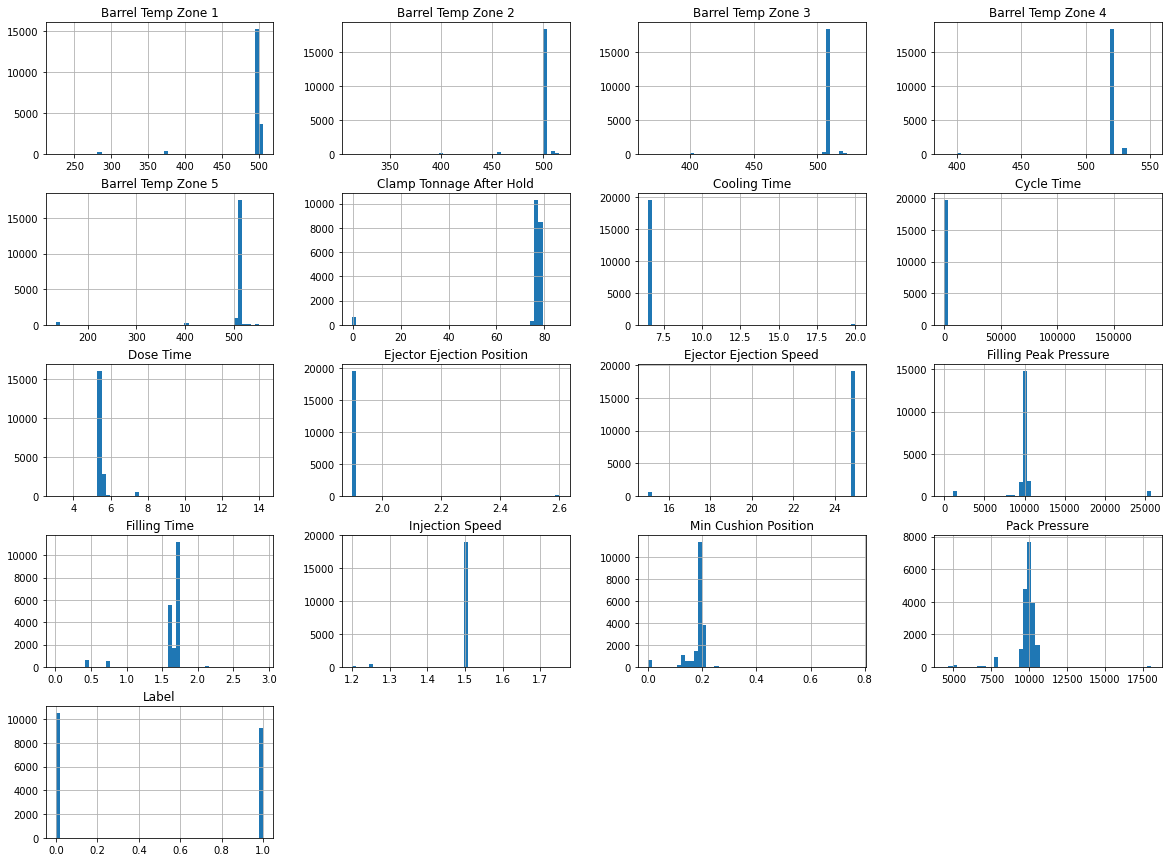

In [8]:
total_runs.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
corr_matrix = total_runs.corr()
corr_matrix["Label"].sort_values(ascending=False)

CAPAB_NAME
Label                        1.000000
Dose Time                    0.288644
Ejector Ejection Position    0.108896
Cooling Time                 0.103054
Filling Peak Pressure        0.036589
Cycle Time                   0.013476
Barrel Temp Zone 4          -0.089287
Barrel Temp Zone 3          -0.114472
Clamp Tonnage After Hold    -0.157995
Barrel Temp Zone 2          -0.159590
Barrel Temp Zone 5          -0.176815
Injection Speed             -0.189293
Ejector Ejection Speed      -0.189305
Barrel Temp Zone 1          -0.202517
Pack Pressure               -0.302368
Filling Time                -0.378035
Min Cushion Position        -0.412178
Name: Label, dtype: float64

array([[<AxesSubplot:xlabel='Label', ylabel='Label'>,
        <AxesSubplot:xlabel='Pack Pressure', ylabel='Label'>,
        <AxesSubplot:xlabel='Filling Time', ylabel='Label'>,
        <AxesSubplot:xlabel='Min Cushion Position', ylabel='Label'>],
       [<AxesSubplot:xlabel='Label', ylabel='Pack Pressure'>,
        <AxesSubplot:xlabel='Pack Pressure', ylabel='Pack Pressure'>,
        <AxesSubplot:xlabel='Filling Time', ylabel='Pack Pressure'>,
        <AxesSubplot:xlabel='Min Cushion Position', ylabel='Pack Pressure'>],
       [<AxesSubplot:xlabel='Label', ylabel='Filling Time'>,
        <AxesSubplot:xlabel='Pack Pressure', ylabel='Filling Time'>,
        <AxesSubplot:xlabel='Filling Time', ylabel='Filling Time'>,
        <AxesSubplot:xlabel='Min Cushion Position', ylabel='Filling Time'>],
       [<AxesSubplot:xlabel='Label', ylabel='Min Cushion Position'>,
        <AxesSubplot:xlabel='Pack Pressure', ylabel='Min Cushion Position'>,
        <AxesSubplot:xlabel='Filling Time', ylabel='M

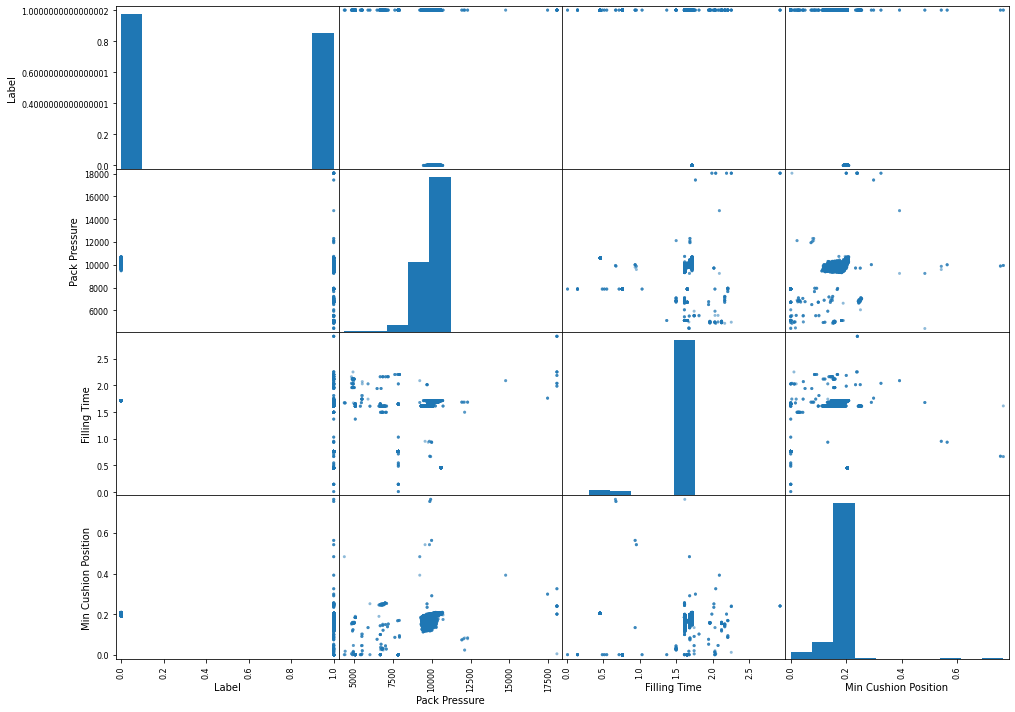

In [10]:
from pandas.plotting import scatter_matrix
attributes = ['Label','Pack Pressure', 'Filling Time', 'Min Cushion Position']
scatter_matrix(total_runs[attributes], figsize=(16, 12))

array([[<AxesSubplot:xlabel='Label', ylabel='Label'>,
        <AxesSubplot:xlabel='Min Cushion Position', ylabel='Label'>],
       [<AxesSubplot:xlabel='Label', ylabel='Min Cushion Position'>,
        <AxesSubplot:xlabel='Min Cushion Position', ylabel='Min Cushion Position'>]],
      dtype=object)

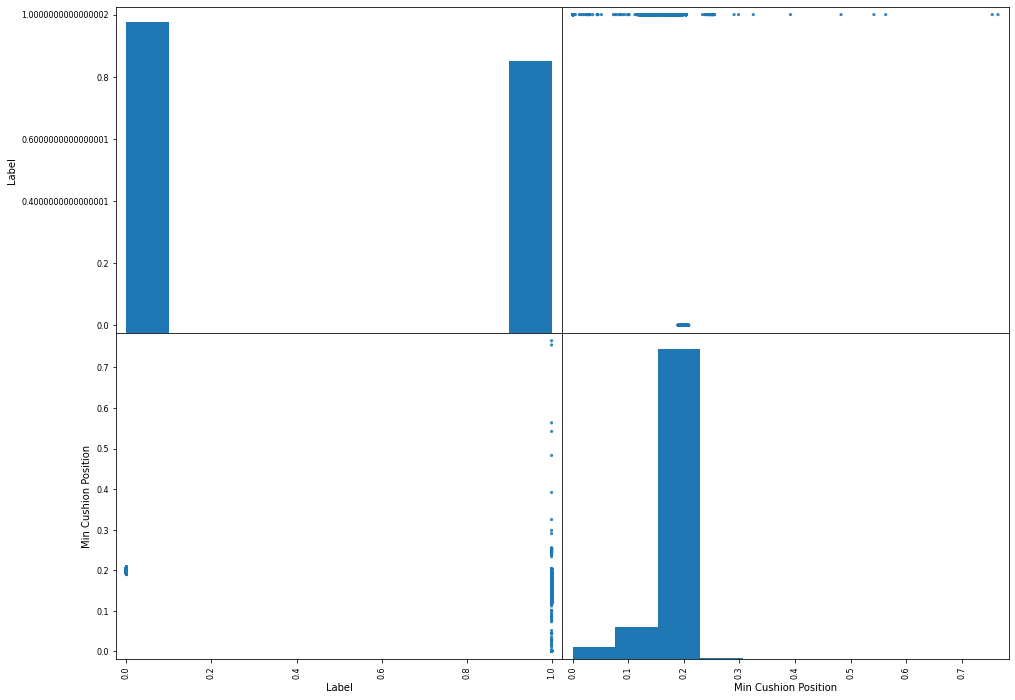

In [11]:
scatter_matrix(total_runs[["Label", "Min Cushion Position"]], figsize=(16, 12))

### Creating Test Set

In [12]:
from sklearn.model_selection import train_test_split

X_set = total_runs.drop(['Label', 'TIME_STAMP'], axis=1)
Y_set = total_runs['Label']

X_train, X_test, y_train, y_test = train_test_split(X_set, Y_set, test_size=0.2, stratify=Y_set, random_state=42)

##### Check Statified Proportions

In [13]:
real_proportion = total_runs['Label'].value_counts() / total_runs['Label'].size
real_proportion

0    0.533404
1    0.466596
Name: Label, dtype: float64

In [14]:
train_proportion = y_train.value_counts() / y_train.size
train_proportion

0    0.53338
1    0.46662
Name: Label, dtype: float64

In [15]:
test_proportion = y_test.value_counts() / y_test.size
test_proportion

0    0.533502
1    0.466498
Name: Label, dtype: float64

# Classification Models

## Stochastic Gradient Descent (SGD) Classifier

In [16]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

### Confusion Matrix

In [17]:
from sklearn.model_selection import cross_val_predict

train_pred_sgd = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [18]:
# Testing whether a fitting the model affects the cross-validation
unfit_sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
unfit_train_pred_sgd = cross_val_predict(unfit_sgd_clf, X_train, y_train, cv=3)

In [19]:
from sklearn.metrics import confusion_matrix

SGD_conf_matrix = confusion_matrix(y_train, train_pred_sgd)
SGD_conf_matrix

array([[6996, 1441],
       [3251, 4130]], dtype=int64)

### Precision & Recall

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

def print_scores(y_data, y_pred):
    print(f"Precision: {precision_score(y_data, y_pred)}")
    print(f"Recall: {recall_score(y_data, y_pred)}")
    print(f"F1 Score: {f1_score(y_data, y_pred)}")

In [21]:
print_scores(y_train, train_pred_sgd)

Precision: 0.7413390773649255
Recall: 0.5595447771304701
F1 Score: 0.6377393452748611


### Precision/Recall Trade-off

In [22]:
scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3, method="decision_function")

In [23]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, scores)

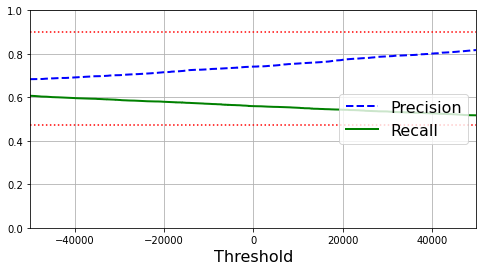

In [24]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
plt.show()

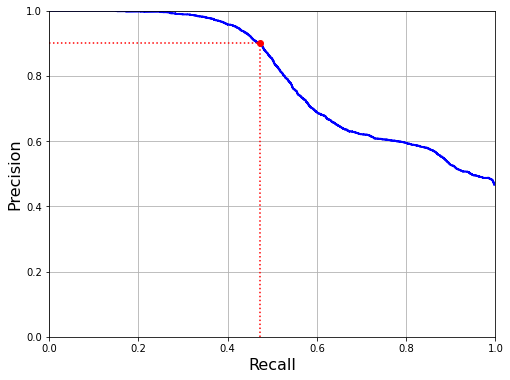

In [25]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

### The ROC Curve

In [26]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, scores)

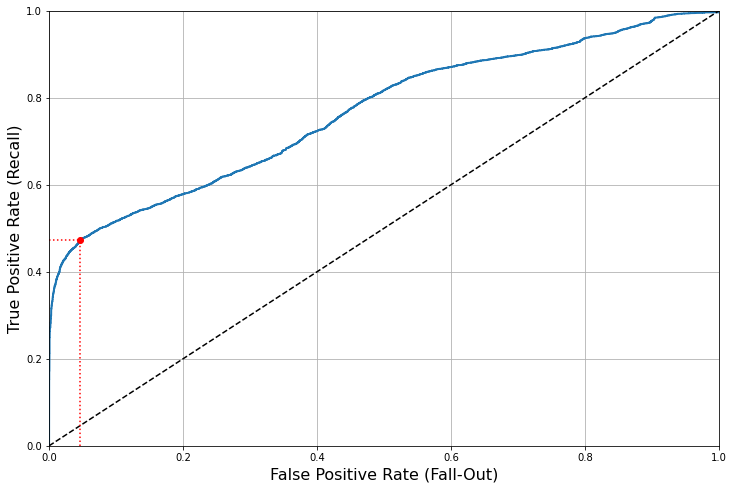

In [27]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(12, 8))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
plt.show()

In [28]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, scores)

0.7663521610164273

## Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### ROC Curve Comparision

In [30]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3, method="predict_proba")
scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, scores_forest)

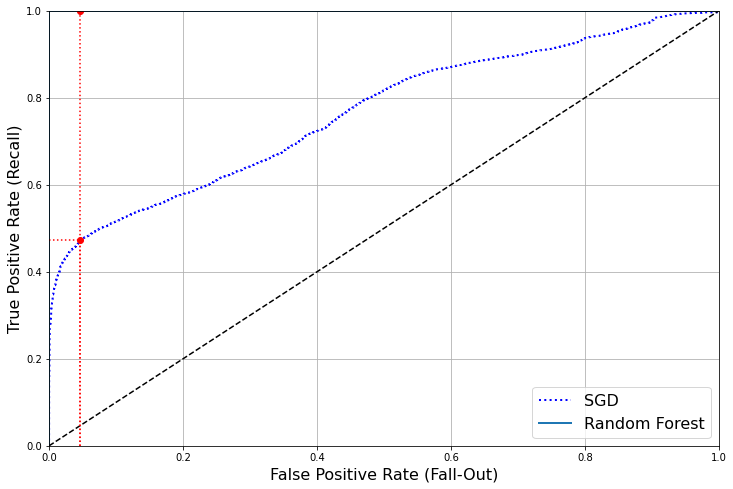

In [31]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [32]:
roc_auc_score(y_train, scores_forest)

0.9999999678836087

### Precision & Recall

In [33]:
train_pred_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3)
print_scores(y_train, train_pred_forest)

Precision: 1.0
Recall: 0.9994580680124644
F1 Score: 0.999728960563762


### Confusion Matrix

In [34]:
forest_conf_matrix = confusion_matrix(y_train, train_pred_forest)
forest_conf_matrix

array([[8437,    0],
       [   4, 7377]], dtype=int64)

### Feature Importance

In [35]:
for name, score in sorted(zip(forest_clf.feature_importances_, X_train,), reverse=True):
    print(name, score)

0.3879223689206142 Filling Time
0.18258957940891185 Min Cushion Position
0.1449718967656082 Dose Time
0.1364997363705596 Clamp Tonnage After Hold
0.047320283455579565 Pack Pressure
0.04107256736156387 Cycle Time
0.04060848297401547 Filling Peak Pressure
0.006553978771463807 Barrel Temp Zone 5
0.004806621669936879 Barrel Temp Zone 2
0.0022121745299132334 Barrel Temp Zone 4
0.0020403293777578805 Barrel Temp Zone 3
0.0017829871927569178 Barrel Temp Zone 1
0.0011456289826288896 Ejector Ejection Speed
0.0004733642186896141 Injection Speed
0.0 Ejector Ejection Position
0.0 Cooling Time


### Testing Dataset with RandomForest

In [36]:
y_predicted = forest_clf.predict(X_test)
print_scores(y_test, y_predicted)

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [37]:
test_forest_conf_matrix = confusion_matrix(y_test, y_predicted)
test_forest_conf_matrix

array([[2110,    0],
       [   0, 1845]], dtype=int64)

## Log Regressor

In [38]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

In [39]:
train_pred_log = cross_val_predict(log_reg, X_train, y_train, cv=3)
print_scores(y_train, train_pred_log)

Precision: 0.9015953481437304
Recall: 0.8192656821568893
F1 Score: 0.8584611016467917


In [40]:
log_conf_matrix = confusion_matrix(y_train, train_pred_log)
log_conf_matrix

array([[7777,  660],
       [1334, 6047]], dtype=int64)

## Support Vector Machines

#### Linear SVM (Soft Margins)

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
soft_svm_clf = SVC(kernel="linear", C=25)
soft_svm_clf.fit(X_train_scaled, y_train)

SVC(C=25, kernel='linear')

In [42]:
train_pred_soft_svm = cross_val_predict(soft_svm_clf, X_train_scaled, y_train, cv=3)
print_scores(y_train, train_pred_soft_svm)

Precision: 0.9997181907848387
Recall: 0.9612518628912071
F1 Score: 0.9801077496891836


In [43]:
soft_svm_conf_matrix = confusion_matrix(y_train, train_pred_soft_svm)
soft_svm_conf_matrix

array([[8435,    2],
       [ 286, 7095]], dtype=int64)

#### Linear SVM (Hard Margins)

In [44]:
hard_svm_clf = SVC(kernel="linear", C=100)
hard_svm_clf.fit(X_train_scaled, y_train)

SVC(C=100, kernel='linear')

In [45]:
train_pred_hard_svm = cross_val_predict(hard_svm_clf, X_train_scaled, y_train, cv=3)
print_scores(y_train, train_pred_hard_svm)

Precision: 0.9992978514253616
Recall: 0.9640970058257688
F1 Score: 0.9813818783616052


In [46]:
hard_svm_conf_matrix = confusion_matrix(y_train, train_pred_hard_svm)
hard_svm_conf_matrix

array([[8432,    5],
       [ 265, 7116]], dtype=int64)

#### Linear SVM with Polynomial Features

In [47]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X_train_scaled, y_train)

C:\Users\buddy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

In [48]:
train_pred_poly_lin_svm = cross_val_predict(polynomial_svm_clf, X_train_scaled, y_train, cv=3)
print_scores(y_train, train_pred_poly_lin_svm)

C:\Users\buddy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\buddy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\buddy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Precision: 0.9994517543859649
Recall: 0.9879420132773337
F1 Score: 0.9936635552224568


In [49]:
poly_lin_svm_conf_matrix = confusion_matrix(y_train, train_pred_poly_lin_svm)
poly_lin_svm_conf_matrix

array([[8433,    4],
       [  89, 7292]], dtype=int64)

#### Polynomial Kernel SVM

In [50]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X_train_scaled, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [51]:
train_pred_poly_kernel_svm = cross_val_predict(poly_kernel_svm_clf, X_train_scaled, y_train, cv=3)
print_scores(y_train, train_pred_poly_kernel_svm)

Precision: 0.9994532531437944
Recall: 0.9906516732150115
F1 Score: 0.9950329999319589


In [52]:
poly_kernel_svm_conf_matrix = confusion_matrix(y_train, train_pred_poly_kernel_svm)
poly_kernel_svm_conf_matrix

array([[8433,    4],
       [  69, 7312]], dtype=int64)

#### Gaussian RBF Kernel

In [53]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X_train_scaled, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

In [54]:
train_pred_rbf_kernel_svm = cross_val_predict(rbf_kernel_svm_clf, X_train_scaled, y_train, cv=3)
print_scores(y_train, train_pred_rbf_kernel_svm)

Precision: 0.9950132460651395
Recall: 0.8650589351036445
F1 Score: 0.9254964487606899


In [55]:
rbf_kernel_svm_conf_matrix = confusion_matrix(y_train, train_pred_rbf_kernel_svm)
rbf_kernel_svm_conf_matrix

array([[8405,   32],
       [ 996, 6385]], dtype=int64)

## Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [57]:
train_pred_tree = cross_val_predict(tree_clf, X_train_scaled, y_train, cv=3)
print_scores(y_train, train_pred_tree)

Precision: 0.9931160438325373
Recall: 0.957729304972226
F1 Score: 0.9751017311538727


In [58]:
tree_conf_matrix = confusion_matrix(y_train, train_pred_tree)
tree_conf_matrix

array([[8388,   49],
       [ 312, 7069]], dtype=int64)

## AdaBoost

In [59]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

In [60]:
train_pred_ada = cross_val_predict(ada_clf, X_train, y_train, cv=3)
print_scores(y_train, train_pred_ada)

Precision: 0.9998645170031161
Recall: 0.9998645170031161
F1 Score: 0.9998645170031161


In [61]:
ada_conf_matrix = confusion_matrix(y_train, train_pred_ada)
ada_conf_matrix

array([[8436,    1],
       [   1, 7380]], dtype=int64)

In [62]:
ada_y_predicted = ada_clf.predict(X_test)
print_scores(y_test, ada_y_predicted)

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


# Tuning Hyperparameters

##### Random Forest Classifier - Random Search

In [63]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

tweak_forest_clf = RandomForestClassifier(random_state=42)
rnd_search = RandomizedSearchCV(tweak_forest_clf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000193138CE9A0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019313807EE0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [64]:
rnd_search.best_estimator_

RandomForestClassifier(max_features=7, n_estimators=180, random_state=42)

In [65]:
for name, score in sorted(zip(rnd_search.best_estimator_.feature_importances_, X_train,), reverse=True):
    print(name, score)

0.5028080975362289 Filling Time
0.25914005276135543 Min Cushion Position
0.09174481807413204 Dose Time
0.08918483525816133 Clamp Tonnage After Hold
0.021891713851294684 Cycle Time
0.01925822152453921 Filling Peak Pressure
0.01371520985886937 Pack Pressure
0.0011926973374523115 Barrel Temp Zone 5
0.0004377738585041003 Barrel Temp Zone 2
0.00033093156266535015 Barrel Temp Zone 4
0.00013103393294854252 Barrel Temp Zone 1
0.00010526600162221377 Barrel Temp Zone 3
3.630846579088927e-05 Ejector Ejection Speed
2.3039976435617404e-05 Injection Speed
0.0 Ejector Ejection Position
0.0 Cooling Time


In [66]:
tweaked_forest_clf = RandomForestClassifier(max_features=7, n_estimators=180, random_state=42)

train_pred_tweaked_forest = cross_val_predict(tweaked_forest_clf, X_train, y_train, cv=3)
print_scores(y_train, train_pred_tweaked_forest)

Precision: 1.0
Recall: 0.9998645170031161
F1 Score: 0.9999322539123366


In [67]:
tweaked_forest_conf_matrix = confusion_matrix(y_train, train_pred_tweaked_forest)
tweaked_forest_conf_matrix

array([[8437,    0],
       [   1, 7380]], dtype=int64)

In [68]:
tweaked_forest_clf.fit(X_train, y_train)
tweaked_y_predicted = tweaked_forest_clf.predict(X_test)
print_scores(y_test, tweaked_y_predicted)

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


##### Random Forest Classifier - Random Search with More Features

In [69]:
second_param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
        'min_samples_split': randint(low=1, high=8),
        'min_samples_leaf': randint(low=1, high=8),
        'max_leaf_nodes': randint(low=1, high=8),
    }

second_rnd_search = RandomizedSearchCV(forest_clf, param_distributions=second_param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
second_rnd_search.fit(X_train, y_train)

C:\Users\buddy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\buddy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\buddy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019302774730>,
                                        'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000193138E31C0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000193138CE250>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019302774FA0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000193152B6400>},
                   random_state=42, scoring='neg_mean_squared_error')

In [70]:
second_rnd_search.best_estimator_

RandomForestClassifier(max_features=7, max_leaf_nodes=6, min_samples_leaf=6,
                       min_samples_split=7, n_estimators=190, random_state=42)

In [71]:
second_tweaked_forest_clf = RandomForestClassifier(max_features=7, max_leaf_nodes=6, min_samples_leaf=6,
min_samples_split=7, n_estimators=190, random_state=42)

train_pred_second_tweaked_forest = cross_val_predict(second_tweaked_forest_clf, X_train, y_train, cv=3)
print_scores(y_train, train_pred_second_tweaked_forest)

Precision: 0.9995869475423379
Recall: 0.9836065573770492
F1 Score: 0.9915323682054084


In [72]:
second_tweaked_forest_conf_matrix = confusion_matrix(y_train, train_pred_second_tweaked_forest)
second_tweaked_forest_conf_matrix

array([[8434,    3],
       [ 121, 7260]], dtype=int64)

##### Ada Boost - Random Search

In [73]:
ada_param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'learning_rate': randint(low=1, high=10)

    }

ada_rnd_search = RandomizedSearchCV(ada_clf, param_distributions=ada_param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
ada_rnd_search.fit(X_train, y_train)

In [ ]:
ada_rnd_search.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=3, n_estimators=75, random_state=42)

In [ ]:
tweaked_ada_clf = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),
    algorithm="SAMME.R", learning_rate=1, n_estimators=21, random_state=42
)
tweaked_ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1, n_estimators=21, random_state=42)

In [ ]:
train_pred_tweaked_ada = cross_val_predict(tweaked_ada_clf, X_train, y_train, cv=3)
print_scores(y_train, train_pred_tweaked_ada)

Precision: 0.999864480281881
Recall: 0.9995935510093483
F1 Score: 0.9997289972899729


In [ ]:
tweaked_ada_conf_matrix = confusion_matrix(y_train, train_pred_tweaked_ada)
tweaked_ada_conf_matrix

array([[8436,    1],
       [   3, 7378]], dtype=int64)